## Smarthome Device Efficiency Prediction

In [2]:
# Edit all the Mardown cells below with the appropriate information 
# Run all cells, containing your code 
# Save this Jupyter with the outputs of your executed cells
# PS: Save again the notebook with this outcome.
# PSPS: Don't forget to include the dataset in your submission

**Team:**
* Danny Nguyen


**Course:** CISD 43 – BIG DATA (Spring, 2025)

### Problem Statement
* This project uses a dataset titled "smart_home_device_usage_data.csv" found on Kaggle. The objective will be to predict whether a device is efficient or inefficient. I will aim to do this using supervised classficiation machine learning algorithms.
    
    
    
* **Keywords:** efficiency classification, smart home device
	

### Required packages

* Add instructions to install the required packages


In [7]:
## Your code begins here
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Methodology

Description:

This dataset captures smart home device usage metrics, offering insights into user behavior, device efficiency, and preferences. It includes data on device types, usage patterns, energy consumption, malfunction incidents, and user satisfaction metrics.

Features:

    UserID: Unique identifier for each user.
    DeviceType: Type of smart home device (e.g., Lights, Thermostat).
    UsageHoursPerDay: Average hours per day the device is used.
    EnergyConsumption: Daily energy consumption of the device (kWh).
    UserPreferences: User preference for device usage (0 - Low, 1 - High).
    MalfunctionIncidents: Number of malfunction incidents reported.
    DeviceAgeMonths: Age of the device in months.
    SmartHomeEfficiency (Target Variable): Efficiency status of the smart home device (0 - Inefficient, 1 - Efficient).

1. Explan your big data metodology

I will first try to predict whether a device is considered efficient or inefficient using the K-NN methodology

2. Introduce the topics you used in your project
 * Model 1
    * KNN
 * Model 2
    * Linear Regression
 

### Your code starts here

## Initial Exploratory Data Analysis

In [11]:
## loading dataset
df = pd.read_csv("smart_home_device_usage_data.csv")

In [12]:
df.describe()

,UserID,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
count,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000
mean,2702.000000,12.052992,5.054302,0.511753,2.066445,30.312234,0.376643
std,1559.856083,6.714961,2.878941,0.499908,1.423291,16.990525,0.484589
min,1.000000,0.501241,0.101562,0.000000,0.000000,1.000000,0.000000
25%,1351.500000,6.297871,2.524968,0.000000,1.000000,15.000000,0.000000
50%,2702.000000,11.903768,5.007047,1.000000,2.000000,30.000000,0.000000
75%,4052.500000,17.791751,7.611912,1.000000,3.000000,45.000000,1.000000
max,5403.000000,23.987326,9.998071,1.000000,4.000000,59.000000,1.000000


In [13]:
df.info()
## Inspect data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UserID                5403 non-null   int64  
 1   DeviceType            5403 non-null   object 
 2   UsageHoursPerDay      5403 non-null   float64
 3   EnergyConsumption     5403 non-null   float64
 4   UserPreferences       5403 non-null   int64  
 5   MalfunctionIncidents  5403 non-null   int64  
 6   DeviceAgeMonths       5403 non-null   int64  
 7   SmartHomeEfficiency   5403 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 337.8+ KB


In [14]:
## From above we can see that there are no nulls, but I will make sure.
## There are no missing values either
print(df.isnull().sum())
## Looks like this dataset is fairly clean!

UserID                  0
DeviceType              0
UsageHoursPerDay        0
EnergyConsumption       0
UserPreferences         0
MalfunctionIncidents    0
DeviceAgeMonths         0
SmartHomeEfficiency     0
dtype: int64


In [15]:
## But I know that the datatypes are wrong based on the description of Features in the original dataset page
## For example, DeviceType should be Categorical.

df['DeviceType'] = df['DeviceType'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   UserID                5403 non-null   int64   
 1   DeviceType            5403 non-null   category
 2   UsageHoursPerDay      5403 non-null   float64 
 3   EnergyConsumption     5403 non-null   float64 
 4   UserPreferences       5403 non-null   int64   
 5   MalfunctionIncidents  5403 non-null   int64   
 6   DeviceAgeMonths       5403 non-null   int64   
 7   SmartHomeEfficiency   5403 non-null   int64   
dtypes: category(1), float64(2), int64(5)
memory usage: 301.1 KB


In [16]:
df.head()

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1


In [17]:
df.tail()

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
5398,5399,Thermostat,4.556314,5.871764,1,0,28,0
5399,5400,Lights,0.561856,1.555992,1,4,24,0
5400,5401,Smart Speaker,11.096236,7.677779,0,0,42,0
5401,5402,Security System,8.782169,7.467929,0,2,28,1
5402,5403,Thermostat,13.540381,9.043076,0,0,30,0


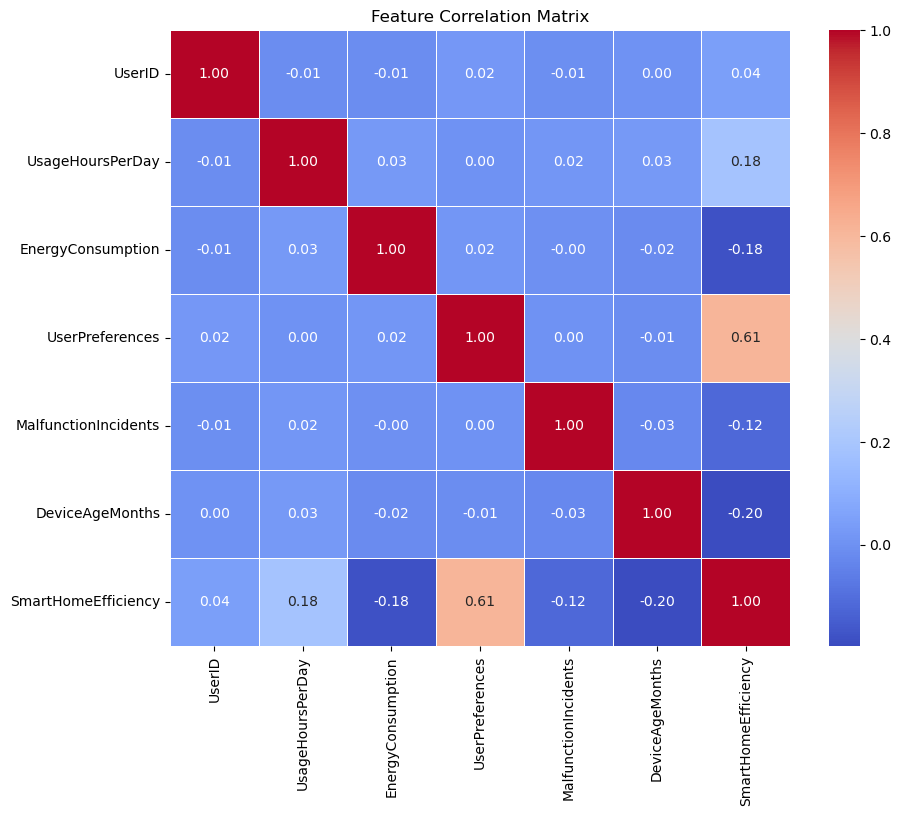

In [18]:
## I want to see the correlation between variables

numeric_df = df.select_dtypes(include=['number']) 
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

## Interestingly, nearly all variables have little correlation with each other, with the exception of UserPreferences and SmartHomeEfficiency
## This makes sense, because a person would likely to use an Efficient device with High preference.

<Axes: xlabel='DeviceType', ylabel='count'>

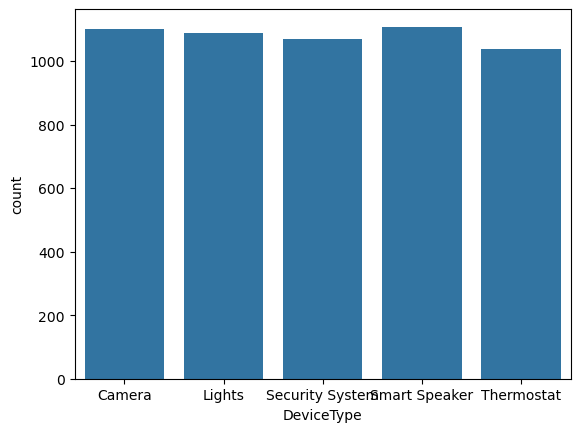

In [22]:
sns.countplot(data=df, x='DeviceType')

### K-Nearest Neighbors Analysis
- I want to categorize whether a device is efficient or inefficient.
- The dataset already includes a column for this target variable, "SmartHomeEfficiency", but I want to see if we can apply machine learning methods using other features to predict it. 

In [30]:
# Note that I had converted "DeviceType" into a categorical variable. To do KNN, I need to convert this to a number through encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["DeviceType"] = le.fit_transform(df["DeviceType"])

## I need to define the features (X) and the target (y)
# For the features, I will remove UserID because that is just a unique identifier, and I will remove the target variable
X = df.drop(['UserID','SmartHomeEfficiency'], axis=1)
y = df['SmartHomeEfficiency']

# Splitting the dataset into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

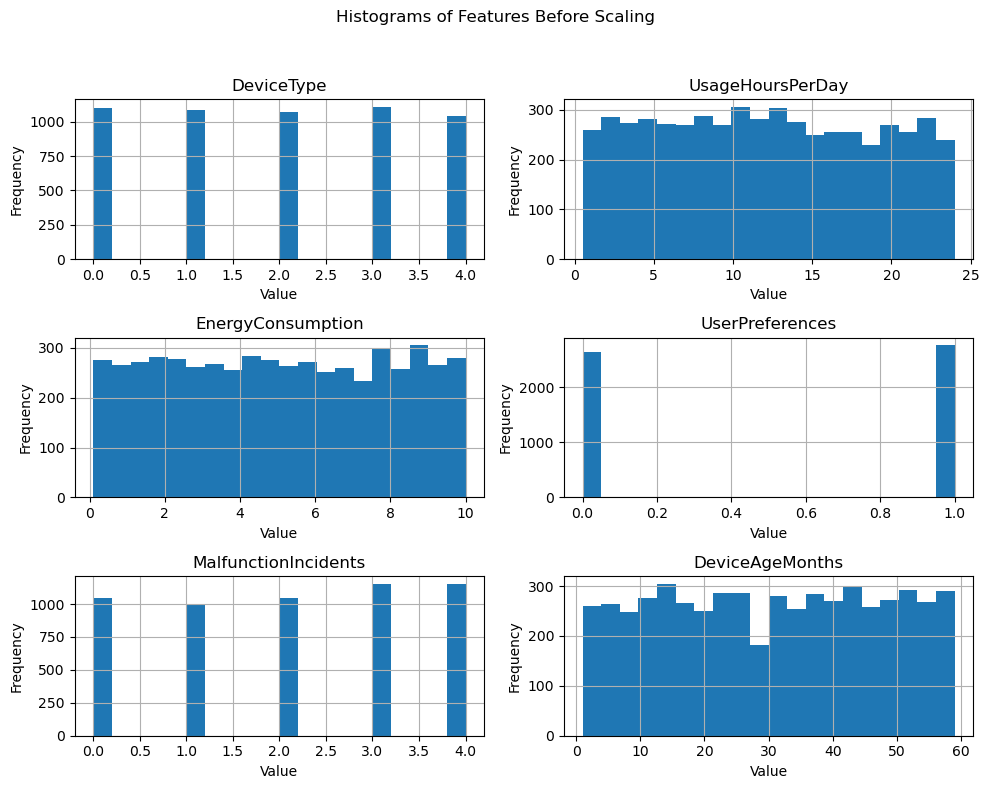

In [33]:
# Plot before scaling
axes = X.hist(figsize=(10, 8), bins=20)

# Iterate over each subplot and set the titles
for ax in axes.flatten():
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.suptitle('Histograms of Features Before Scaling')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the padding to make room for the suptitle
plt.show()

In [34]:
# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Create KNN classifier
k = 5 # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))



[[637  41]
 [ 44 359]]


- The confusion matrix above shows the summary of prediction results. The results of this model are mostly accurate--637 were correctly negative, 359 were correctly positive, while only 41 were incorrectly positive, and only 44 were incorrectly negative.

In [40]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       678
           1       0.90      0.89      0.89       403

    accuracy                           0.92      1081
   macro avg       0.92      0.92      0.92      1081
weighted avg       0.92      0.92      0.92      1081



### Logistic Regression Analysis

In [43]:
## Logstic Regression would also be appropriate for this because it is binomial output
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_predlog = logreg.predict(X_test)

print(confusion_matrix(y_test, y_predlog))

[[608  70]
 [ 65 338]]


In [45]:
print(classification_report(y_test, y_predlog))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       678
           1       0.83      0.84      0.83       403

    accuracy                           0.88      1081
   macro avg       0.87      0.87      0.87      1081
weighted avg       0.88      0.88      0.88      1081



### Conclusions


- The results of our KNN model are also fairly good. The scores are fairly high, indicating that our model is mostly accurate.
- Results of logistic regression model are also not bad, though it performs slightly worse than using KNN.
- The Confusion Matrix for both methods show that the models predicted correctly in most cases.
- These results are not surprising because this is a simple, synthetic dataset that was likely designed for beginner students to practice on.

###  References
   - CISD 43 Course Files and Examples
   - https://medium.com/aiskunks/categorical-data-encoding-techniques-d6296697a40f
	

### Credits

- I looked at code from our CISD 43 course "KNN_Classification_Example 1", ""KNN_Classification_Example 2", and "KNN_Classification_Example 3" as reference for code to set up the K-NN analysis
- I also reference code from our CISD 43 examples relating to MongoDB, Module 12 NoSQL MongoDB Example 1 and Module 12 NoSQL Tutorial and MongoDB Example 2 for examples of query code used together with MongoDB.
- Thanks to the author Krishnakanth Naik Jarapala at this site, https://medium.com/aiskunks/categorical-data-encoding-techniques-d6296697a40f, I was able to find the Python code needed to encode categorical datatypes

## Mongo DB Connection

In [52]:
import pymongo
from pymongo import MongoClient
# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")

In [53]:
db = client['smarthomedeviceefficiency_db']
collection = db['deviceefficiency']

In [54]:
# Retrieve the first three records
retrieve = collection.find().limit(3)
# Print the records
for record in retrieve:
    print(record)

{'_id': ObjectId('6842295f14b42ab475966aeb'), 'UserID': 1, 'DeviceType': 'Smart Speaker', 'UsageHoursPerDay': 15.30718848124909, 'EnergyConsumption': 1.9616068166289793, 'UserPreferences': 1, 'MalfunctionIncidents': 4, 'DeviceAgeMonths': 36, 'SmartHomeEfficiency': 1}
{'_id': ObjectId('6842295f14b42ab475966aec'), 'UserID': 2, 'DeviceType': 'Camera', 'UsageHoursPerDay': 19.9733432937798, 'EnergyConsumption': 8.610688921898104, 'UserPreferences': 1, 'MalfunctionIncidents': 0, 'DeviceAgeMonths': 29, 'SmartHomeEfficiency': 1}
{'_id': ObjectId('6842295f14b42ab475966aed'), 'UserID': 3, 'DeviceType': 'Security System', 'UsageHoursPerDay': 18.91153466115779, 'EnergyConsumption': 2.651776634718286, 'UserPreferences': 1, 'MalfunctionIncidents': 0, 'DeviceAgeMonths': 20, 'SmartHomeEfficiency': 1}


In [58]:
allrecords = collection.find()
mongodf = pd.DataFrame(list(allrecords))
print(mongodf)

                           _id  UserID       DeviceType  UsageHoursPerDay  \
0     6842295f14b42ab475966aeb       1    Smart Speaker         15.307188   
1     6842295f14b42ab475966aec       2           Camera         19.973343   
2     6842295f14b42ab475966aed       3  Security System         18.911535   
3     6842295f14b42ab475966aee       4           Camera          7.011127   
4     6842295f14b42ab475966aef       5           Camera         22.610684   
...                        ...     ...              ...               ...   
5398  6842295f14b42ab475968001    5399       Thermostat          4.556314   
5399  6842295f14b42ab475968002    5400           Lights          0.561856   
5400  6842295f14b42ab475968003    5401    Smart Speaker         11.096236   
5401  6842295f14b42ab475968004    5402  Security System          8.782169   
5402  6842295f14b42ab475968005    5403       Thermostat         13.540381   

      EnergyConsumption  UserPreferences  MalfunctionIncidents  \
0        

In [60]:
allrecords_count = collection.count_documents({})
print(f"Total # of Records: {allrecords_count}")

Total # of Records: 5403


In [62]:
cameradevices = collection.count_documents({"DeviceType": "Camera"})
print("Total number of Camera Records:", cameradevices)

Total number of Camera Records: 1101


In [64]:
# End of Project